### Student Information
Name:陳鈺倫

Student ID: 109020020

GitHub ID: ylchen1805

Kaggle name: My computer is sweating

Kaggle private scoreboard snapshot:

![Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

### First Part

#### Preparation

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
# train_df.head()

#### Exercise 1
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text).sum(axis=0)
temp = pd.DataFrame({"Frequency":train_counts.tolist()[0],
                     "Term":count_vect.get_feature_names_out()}).sort_values(by="Frequency",ascending=False)

# sort
import plotly.express as px
fig = px.bar(temp[:30], 
             x=temp["Term"][:30], 
             y=temp["Frequency"][:30], 
             title  = "TOP30 Word Frequencies in Training data", 
             labels = {'x':'Terms', 'y':'Frequencies'})

fig.show()

In [3]:
count_vect = CountVectorizer()
test_counts = count_vect.fit_transform(test_df.text).sum(axis=0)
temp = pd.DataFrame({"Frequency":test_counts.tolist()[0],
                     "Term":count_vect.get_feature_names_out()}).sort_values(by="Frequency",ascending=False)

# sort
import plotly.express as px
fig = px.bar(temp[:30], x=temp["Term"][:30], y=temp["Frequency"][:30], title  = "TOP30 Word Frequencies (Test data)", labels = {'x':'Terms', 'y':'Frequencies'})

fig.show()

#### Exercise 2
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [4]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

tfidf = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
tfidf.fit(train_df['text'])
feature_names_1000 = tfidf.get_feature_names_out()
print(feature_names_1000[100:110])

/home/allen/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']


#### Exercise 3
Can you interpret the results above? What do they mean?

* From the plot we can discovered that the ***anger*** and ***fear*** are two categories,
which are more likly two be misclassified as another one of them compared with other misclassified categories.
* The performance of ***sadness*** is quit bad, almost half of them were misclassified.
* The performance of ***joy*** is quit good, almost classified all of them correctly.

Total ***anger*** : 84
| Corect Predicted as ***anger*** | Mispredicted as ***fear*** | Mispredicted as ***joy*** | Mispredicted as ***sadness*** |
| :----: | :----: | :----: | :----: |
| 57 | 18 | 6 | 3 |



Total ***fear*** : 110
| Mispredicted as ***anger*** | Corect Predicted as ***fear*** | Mispredicted as ***joy*** | Mispredicted as ***sadness*** |
| :----: | :----: | :----: | :----: |
| 16 | 76 | 9 | 9 |



Total ***joy*** : 79
| Mispredicted as ***anger*** | Mispredicted as ***fear*** | Corect Predicted as ***joy*** | Mispredicted as ***sadness*** |
| :----: | :----: | :----: | :----: |
| 6 | 9 | 56 | 8 |



Total ***sadness*** : 74
| Mispredicted as ***anger*** | Mispredicted as ***fear*** | Mispredicted as ***joy*** | Corect Predicted as ***sadness*** |
| :----: | :----: | :----: | :----: |
| 7 | 13 | 7 | 47 |



#### Prepared Data and Function.

In [5]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])


CountVectorizer(max_features=500,
                tokenizer=<function word_tokenize at 0x7fc622ceb010>)

In [6]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [7]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

#### Exercise 4
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [8]:
# check sklearn version, since defult value of the parameter force_alpha is False before version 1.4
import sklearn
sklearn.__version__

'1.3.2'

In [9]:
from sklearn.naive_bayes import MultinomialNB
Mul_NB = MultinomialNB(force_alpha=True)

# Train
Mul_NB.fit(X_train, y_train)

# Predict
y_train_pred = Mul_NB.predict(X_train)
y_test_pred = Mul_NB.predict(X_test)

In [10]:
# Evaluation
from sklearn.metrics import classification_report
print("y_train:")
print(classification_report(y_true=y_train, y_pred=y_train_pred))
print("y_test:")
print(classification_report(y_true=y_test, y_pred=y_test_pred))

y_train:
              precision    recall  f1-score   support

       anger       0.77      0.80      0.78       857
        fear       0.78      0.81      0.79      1147
         joy       0.87      0.80      0.83       823
     sadness       0.76      0.75      0.76       786

    accuracy                           0.79      3613
   macro avg       0.79      0.79      0.79      3613
weighted avg       0.79      0.79      0.79      3613

y_test:
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



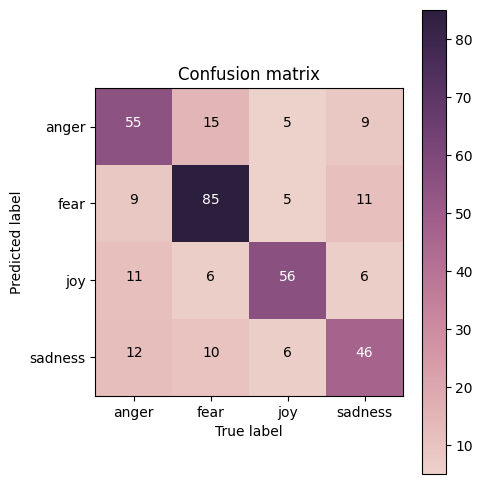

In [11]:
# plot
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

#### Exercise 5
How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

* The decision tree is easy to understand. but without the limitation of height, it is very easy to suffer from overfitting. Also, the way classifies by rectangular partition doesn't handle the correlated features well.
* The Naive Bayes is under the assumption that all class are independent. But the class **angry**, **fear**, **joy** and **sadness** do have some relation between them. As a result Naive Bayes has less consistent values over four emotions.

#### Prepareation

In [14]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']


2023-12-30 21:41:16.744312: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

In [16]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# I/O
input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)
# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

2023-12-30 21:41:25.425795: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


2023-12-30 21:41:25.517551: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [3613,3]
	 [[{{node Placeholder/_0}}]]
2023-12-30 21:41:25.517782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [3613,4]
	 [[{{node Placeholder/_1}}]]


108/113 [===========================>..] - ETA: 0s - loss: 1.3348 - accuracy: 0.3498

2023-12-30 21:41:26.171201: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [347,4]
	 [[{{node Placeholder/_1}}]]


113/113 [==============================] - 1s 4ms/step - loss: 1.3325 - accuracy: 0.3546 - val_loss: 1.2867 - val_accuracy: 0.4697
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 1.0128 - accuracy: 0.6208 - val_loss: 0.9259 - val_accuracy: 0.6859
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.6087 - accuracy: 0.7836 - val_loss: 0.7812 - val_accuracy: 0.7118
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8442 - val_loss: 0.8001 - val_accuracy: 0.6916
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8860 - val_loss: 0.8214 - val_accuracy: 0.6945
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2638 - accuracy: 0.9089 - val_loss: 0.8978 - val_accuracy: 0.7003
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 0.9280 - val_loss: 0.9201 - val_accuracy: 0.7032
Epoch 8/25
113/11

#### Exercise 6

/home/allen/anaconda3/envs/DM_LAB2/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/allen/anaconda3/envs/DM_LAB2/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/allen/anaconda3/envs/DM_LAB2/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/allen/anaconda3/envs/DM_LAB2/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/allen/anaconda3/envs/DM_LAB2/lib/python3.10/site-packa

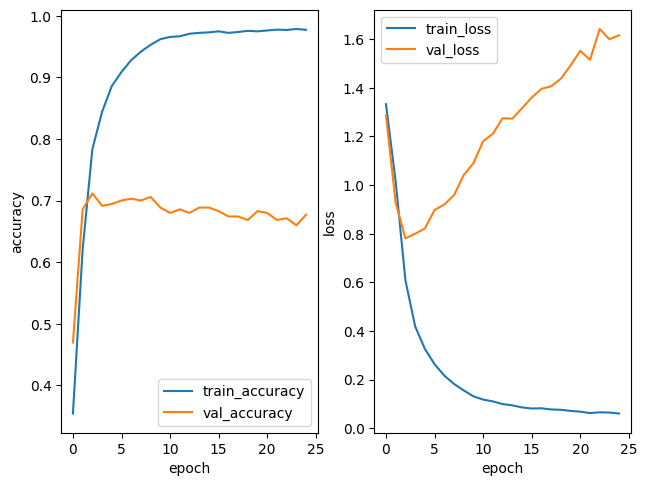

In [18]:
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log.columns = map((lambda x: x.strip()), training_log.columns)

fig, ax = plt.subplots(1,2)
fig.tight_layout(pad=1.0)
sns.lineplot(training_log, x='epoch', y='accuracy', label='train_accuracy', ax=ax[0])
sns.lineplot(training_log, x='epoch', y='val_accuracy', label='val_accuracy', ax=ax[0])
sns.lineplot(training_log, x='epoch', y='loss', label='train_loss', ax=ax[1])
sns.lineplot(training_log, x='epoch', y='val_loss', label='val_loss', ax=ax[1])
plt.show()


* The training accuracy is increasing, but the validation accuracy is not.
* The training loss is decreasing, but the validation loss is not.
> The model is learning some patterns from the training data, but it is not generalized term.
Maybe is a sign of overfitting.

#### Exercise 7

* Use the average of all word vectors to represent as the vector of the sequence.
* Design model that can deal with sequence data, like GRU, LSTM...
* Use those vectors to train obtain and embedding to represent them, like Doc2Vec.

#### Preparation

In [20]:
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))

## create the training corpus
training_corpus = train_df['text_tokenized'].values

In [21]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
MODEL_NAME = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(MODEL_NAME, binary=True)
print('load ok')

load ok


#### Exercise 8

In [22]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

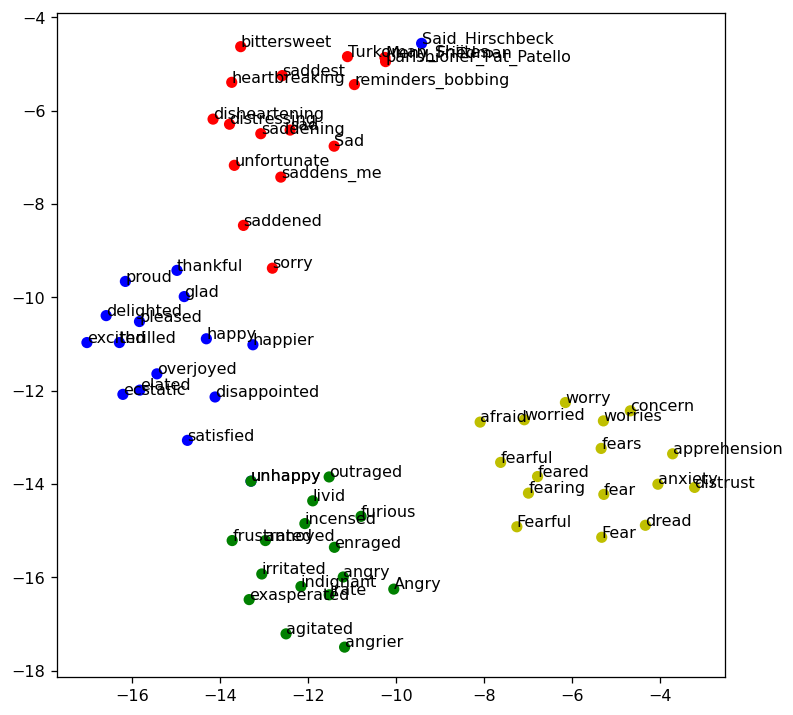

In [23]:
from sklearn.manifold import TSNE

model = w2v_google_model

size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]


## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=1)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

### Second Part

#### Preprocess while EDA

EDA written in below with markdown block and comment.
While doing this, I found some methods are super helpful:
* .explode(): unpack list in Dataframe. Help me dealing with the mentions and hashtags because I stored them with list after extracted from the text.
* .progress_map(): from tqdm package. Alow me to see whethere the function is working, or just dead loop.
* .join(): extremely fast when join dataframes together.    

A new technique I learned is you can creating a function object returning from another function, by doing this I can get the custom function without further specify the parameters. I used this to create a function that processed the mentions in text, this technique help the code become clean and easy to read.

##### Make dataframe and save to pickle file

So that we don't need to processed it again. And continue dealing with data without waiting after each preprocessed.

In [2]:
from datetime import datetime 
import re
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from tqdm.auto import tqdm
tqdm.pandas()

/home/allen/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [47]:
EMOTION_NAMES = ['joy', 'anticipation', 'trust' , 'sadness' , 'disgust' , 'fear' , 'surprise', 'anger']
MODEL_NAME = 'cardiffnlp/twitter-roberta-base-sentiment-latest'

In [4]:
identifies = pd.read_csv('data/data_identification.csv', index_col='tweet_id')
labels = pd.read_csv('data/emotion.csv', index_col='tweet_id')

In [5]:
print(identifies.value_counts('identification'))
print(identifies.head())
print(labels.head())

identification
train    1455563
test      411972
dtype: int64
         identification
tweet_id               
0x28cc61           test
0x29e452          train
0x2b3819          train
0x2db41f           test
0x2a2acc          train
               emotion
tweet_id              
0x3140b1       sadness
0x368b73       disgust
0x296183  anticipation
0x2bd6e1           joy
0x2ee1dd  anticipation


In [6]:
train_idxs = identifies.index[identifies['identification'] == 'train']
train_labels = labels.loc[train_idxs, 'emotion']
assert train_idxs.shape == train_labels.shape, "Labels and data have different length!"

In [7]:
data = pd.read_json('data/tweets_DM.json', lines=True).drop(columns=['_index', '_type']) # feature selection

In [8]:
source = data['_source']

In [9]:
source[0]['tweet']

{'hashtags': ['Snapchat'],
 'tweet_id': '0x376b20',
 'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'}

In [10]:
data.head()

,_score,_source,_crawldate
0,391,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47
1,433,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09
2,232,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20
3,376,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05
4,989,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59


In [11]:
tweet = pd.DataFrame(source.progress_map(lambda x : x["tweet"]).tolist()) # dealing with _source data
data = pd.concat([data, tweet], axis=1)
data = data.drop(columns=['_source'])

data.set_index('tweet_id', inplace=True)


100%|██████████| 1867535/1867535 [00:01<00:00, 1469077.49it/s]


In [12]:
data.head()

,_score,_crawldate,hashtags,text
tweet_id,,,,
0x376b20,391,2015-05-23 11:42:47,[Snapchat],"People who post ""add me on #Snapchat"" must be ..."
0x2d5350,433,2016-01-28 04:52:09,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #..."
0x28b412,232,2017-12-25 04:39:20,[bibleverse],"Confident of your obedience, I write to you, k..."
0x1cd5b0,376,2016-01-24 23:53:05,[],Now ISSA is stalking Tasha 😂😂😂 <LH>
0x2de201,989,2016-01-08 17:18:59,[],"""Trust is not the same as faith. A friend is s..."


In [13]:
train_data = data.loc[train_idxs, :].sort_values(by='tweet_id')
test_data = data.loc[~data.index.isin(train_idxs), :].sort_values(by='tweet_id')
train_labels = train_labels.sort_index()

assert len(train_data) == len(train_labels), "Labels and data have different length!"
assert np.all(train_data.index == train_labels.index), "Labels and data have different order!"

In [14]:
# Save as pickle file, so that we don't need to processed it again
train_data.to_pickle('data/train_data.pkl')
train_labels.to_pickle('data/train_labels.pkl')
test_data.to_pickle('data/test_data.pkl')

##### Label distribution

In [15]:
# Read files
train_data = pd.read_pickle('data/train_data.pkl')
train_labels = pd.read_pickle('data/train_labels.pkl')
data = pd.concat([train_data, train_labels], axis=1)# Make frame

In [16]:
data.head()

,_score,_crawldate,hashtags,text,emotion
tweet_id,,,,,
0x1c7f10,242,2015-05-16 10:36:47,[BlackMirror],o m g Shut Up And Dance though #BlackMirror <LH>,joy
0x1c7f11,915,2016-10-15 20:46:37,"[twitch, Destinybeta, Destiny, Destiny2, Desti...",On #twitch <LH> on the #Destinybeta #Destiny #...,anticipation
0x1c7f14,939,2016-07-04 07:22:56,[],A nice sunny wak this morning not many <LH> ar...,joy
0x1c7f15,181,2016-04-16 12:53:40,"[Confession, NationalCandyCornDay, CouldEatThe...",I'm one of those people who love candy corn......,joy
0x1c7f16,970,2017-04-22 17:50:28,[],@metmuseum What are these? They look like some...,disgust


In [17]:
data.value_counts('emotion')

emotion
joy             516017
anticipation    248935
trust           205478
sadness         193437
disgust         139101
fear             63999
surprise         48729
anger            39867
dtype: int64

<Axes: xlabel='emotion'>

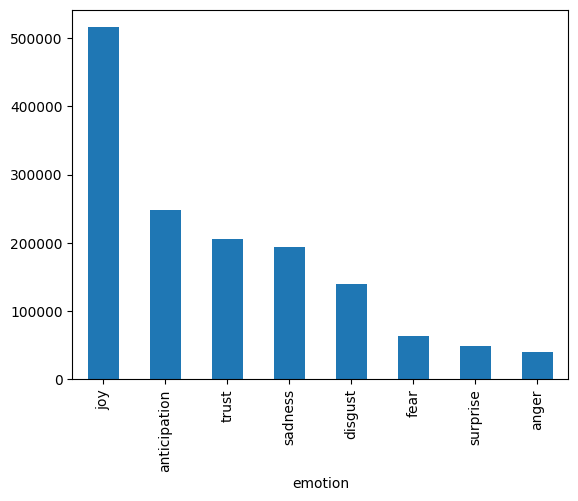

In [18]:
data.value_counts('emotion').plot.bar()

##### Delete \<LH\> in text

In [19]:
data["preprocessed_text"] = data["text"].progress_map(lambda x : x.replace("<LH>", ''))

100%|██████████| 1455563/1455563 [00:01<00:00, 1333761.90it/s]


##### User mention distribution

In [20]:
data["mentions"] = data["text"].progress_map(lambda x : re.findall(r'@([a-zA-Z0-9_]+)', x))

100%|██████████| 1455563/1455563 [00:01<00:00, 900344.46it/s]


In [21]:
data["mentions"].explode().value_counts()[:10]

realDonaldTrump    27254
FifthHarmony       11085
MostRequestLive     5366
POTUS               5130
OnAirRomeo          5014
DonnieWahlberg      3945
FoxNews             2689
CNN                 2482
IssaRae             1676
Browns              1553
Name: mentions, dtype: int64

##### Replace the mentions that apears less than 10 times

In [22]:
def create_mentions_replace_function(mentions: pd.Series, threshold = 10):
    '''Create mentions replace function
    Return a custom function object that Replace the mentions smaller then $threshold by the table created using given series.
    mentions: pd.Series
    threshold:int = 10

    Return function object
    '''
    MENTIONS_TABLE = mentions.explode().value_counts()
    print("Create mention table finished.")
    def custom_mentions_replace_function(text: str):
        user_mentions = re.findall(r'@([a-zA-Z0-9_]+)', text)
        for user_mention in user_mentions:
            if user_mention in MENTIONS_TABLE.index and  MENTIONS_TABLE[user_mention] < threshold:
                # By checking whether user_mention is in MENTIONS_TABLE.index first, the fuction can be applied to the text from test data.
                # The mention that are not appear in training data will not be replace.
                text = text.replace(f'@{user_mention}', f'@user')
        return text
    return custom_mentions_replace_function

In [23]:
custom_mentions_replace_function = create_mentions_replace_function(data["mentions"])

Create mention table finished.


In [24]:
data["preprocessed_text"] = data["preprocessed_text"].progress_map(custom_mentions_replace_function)

100%|██████████| 1455563/1455563 [00:03<00:00, 364566.66it/s]


In [25]:
print("Before processed: ")
print("\tNumber of mentions: ", len(data["mentions"].explode().unique()))
print("\tText: ", data["text"][4])

Before processed: 
	Number of mentions:  337873
	Text:  @metmuseum What are these? They look like something toddlers make at summer camp with junk beads. <LH>


In [26]:
print("After processed: ")
print("\tNumber of mentions: ", len(data["preprocessed_text"].map(lambda x : re.findall(r'@([a-zA-Z0-9_]+)', x)).explode().unique()))
print("\tText: ", data["preprocessed_text"][4])

After processed: 
	Number of mentions:  8210
	Text:  @user What are these? They look like something toddlers make at summer camp with junk beads. 


In [27]:
train_data = pd.read_pickle('data/train_data.pkl')
train_data["mentions"] = train_data["text"].progress_map(lambda x : re.findall(r'@([a-zA-Z0-9_]+)', x))
train_data["preprocessed_text"] = train_data["text"].progress_map(lambda x : x.replace("<LH>", '')).progress_map(custom_mentions_replace_function)

100%|██████████| 1455563/1455563 [00:03<00:00, 368028.18it/s]


In [28]:
# processed the test data with same processed
# Noticed the $custom_mentions_replace_function is created from the training data to prevent information leakage.
test_data = pd.read_pickle('data/test_data.pkl')
test_data["mentions"] = test_data["text"].progress_map(lambda x : re.findall(r'@([a-zA-Z0-9_]+)', x))
test_data["preprocessed_text"] = test_data["text"].progress_map(lambda x : x.replace("<LH>", '')).progress_map(custom_mentions_replace_function)

100%|██████████| 411972/411972 [00:00<00:00, 419454.22it/s]


In [29]:
assert np.all(test_data.columns == train_data.columns)

In [30]:
train_data.head()

,_score,_crawldate,hashtags,text,mentions,preprocessed_text
tweet_id,,,,,,
0x1c7f10,242,2015-05-16 10:36:47,[BlackMirror],o m g Shut Up And Dance though #BlackMirror <LH>,[],o m g Shut Up And Dance though #BlackMirror
0x1c7f11,915,2016-10-15 20:46:37,"[twitch, Destinybeta, Destiny, Destiny2, Desti...",On #twitch <LH> on the #Destinybeta #Destiny #...,[],On #twitch on the #Destinybeta #Destiny #Dest...
0x1c7f14,939,2016-07-04 07:22:56,[],A nice sunny wak this morning not many <LH> ar...,[],"A nice sunny wak this morning not many aroud,..."
0x1c7f15,181,2016-04-16 12:53:40,"[Confession, NationalCandyCornDay, CouldEatThe...",I'm one of those people who love candy corn......,[],I'm one of those people who love candy corn......
0x1c7f16,970,2017-04-22 17:50:28,[],@metmuseum What are these? They look like some...,[metmuseum],@user What are these? They look like something...


In [31]:
test_data.head()

,_score,_crawldate,hashtags,text,mentions,preprocessed_text
tweet_id,,,,,,
0x1c7f0f,62,2017-05-14 11:39:43,[],"@JZED74 While inappropriate AF, he likely wasn...",[JZED74],"@JZED74 While inappropriate AF, he likely wasn..."
0x1c7f12,756,2016-02-14 15:55:45,[],I tried to figure out why you mean so much to ...,[],I tried to figure out why you mean so much to ...
0x1c7f13,213,2016-07-25 17:05:35,"[auspol, fizza]","The only “big plan” you ever had in your life,...",[TurnbullMalcolm],"The only “big plan” you ever had in your life,..."
0x1c7f17,603,2017-01-21 19:25:33,[],"Looking back on situations old & new, recent o...",[],"Looking back on situations old & new, recent o..."
0x1c7f18,609,2017-04-25 16:36:47,[],@jasoninthehouse Why do you insist on talking ...,[jasoninthehouse],@jasoninthehouse Why do you insist on talking ...


In [32]:
train_data.to_pickle('data/train_data.pkl')
test_data.to_pickle('data/test_data.pkl')

##### Hashtags distribution

I found that hashtags has long-tailed distribution, also some of them have are related to emotions.  

In [1]:
from datetime import datetime 
import re
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from tqdm.auto import tqdm
tqdm.pandas()

EMOTION_NAMES = ['joy', 'anticipation', 'trust' , 'sadness' , 'disgust' , 'fear' , 'surprise', 'anger']


/home/allen/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Read files
train_data = pd.read_pickle('data/train_data.pkl')
train_labels = pd.read_pickle('data/train_labels.pkl')
data = pd.concat([train_data, train_labels], axis=1)# Make frame

In [3]:
data.head()

,_score,_crawldate,hashtags,text,mentions,preprocessed_text,emotion
tweet_id,,,,,,,
0x1c7f10,242,2015-05-16 10:36:47,[BlackMirror],o m g Shut Up And Dance though #BlackMirror <LH>,[],o m g Shut Up And Dance though #BlackMirror,joy
0x1c7f11,915,2016-10-15 20:46:37,"[twitch, Destinybeta, Destiny, Destiny2, Desti...",On #twitch <LH> on the #Destinybeta #Destiny #...,[],On #twitch on the #Destinybeta #Destiny #Dest...,anticipation
0x1c7f14,939,2016-07-04 07:22:56,[],A nice sunny wak this morning not many <LH> ar...,[],"A nice sunny wak this morning not many aroud,...",joy
0x1c7f15,181,2016-04-16 12:53:40,"[Confession, NationalCandyCornDay, CouldEatThe...",I'm one of those people who love candy corn......,[],I'm one of those people who love candy corn......,joy
0x1c7f16,970,2017-04-22 17:50:28,[],@metmuseum What are these? They look like some...,[metmuseum],@user What are these? They look like something...,disgust


Some hashtags are empty

<Axes: >

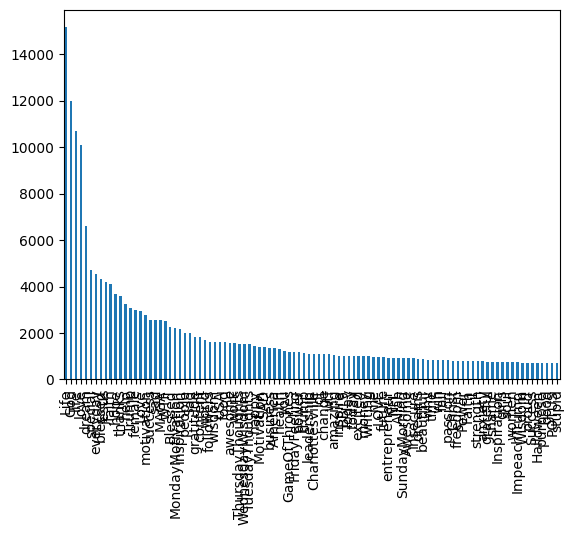

In [4]:
data["hashtags"].explode().value_counts()[:100].plot.bar()

In [5]:
data["hashtags"].explode().value_counts().head()

Life     15160
God      11971
life     10715
love     10090
dream     6622
Name: hashtags, dtype: int64

In [6]:
data["preprocessed_hashtags"] = data["hashtags"].progress_map(lambda x : [tag.lower() for tag in x] if len(x) else ['noTag']) # turn all hastags into lower case

100%|██████████| 1455563/1455563 [00:01<00:00, 997141.84it/s] 


In [7]:
data["preprocessed_hashtags"].explode().value_counts().head()

noTag    696358
life      26147
love      14038
god       12177
dream      6964
Name: preprocessed_hashtags, dtype: int64

In [8]:
unique_tags = data["preprocessed_hashtags"].explode().unique()
len(unique_tags)

325137

In [9]:
hashtags_emotion_data = data[['preprocessed_hashtags', 'emotion']].explode('preprocessed_hashtags').reset_index().fillna("noTag") # deal with no tags data
hashtags_emotion_data.drop_duplicates(inplace=True)
hashtags_emotion_data.set_index("tweet_id", inplace=True)
hashtags_emotion_data

,preprocessed_hashtags,emotion
tweet_id,,
0x1c7f10,blackmirror,joy
0x1c7f11,twitch,anticipation
0x1c7f11,destinybeta,anticipation
0x1c7f11,destiny,anticipation
0x1c7f11,destiny2,anticipation
...,...,...
0x38fe1a,maga,surprise
0x38fe1c,noTag,disgust
0x38fe1d,redheadproblems,sadness


In [10]:
hashtags_emotion_table = hashtags_emotion_data\
                            .groupby("preprocessed_hashtags")\
                            .value_counts(dropna=False)\
                            .reset_index(name="count")\
                            .pivot(index='preprocessed_hashtags', columns='emotion', values='count')\
                            .fillna(0.0)
hashtags_emotion_table

emotion,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
preprocessed_hashtags,,,,,,,,
0,2.0,0.0,9.0,0.0,6.0,6.0,0.0,0.0
00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0000ff,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0001,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0002,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
２０２１,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
２４歳,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
ｆｏｌｌｏｗ,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [11]:
test_data = pd.read_pickle('data/test_data.pkl')
train_data = pd.read_pickle('data/train_data.pkl')
train_data["preprocessed_hashtags"] = train_data["hashtags"].progress_map(lambda x : [tag.lower() for tag in x] if len(x) else ['noTag'])
test_data["preprocessed_hashtags"] = test_data["hashtags"].progress_map(lambda x : [tag.lower() for tag in x] if len(x) else ['noTag'])
hashtags_emotion_table.to_csv("EDA/hashtags_emotion_table.csv")
train_data.to_pickle('data/train_data.pkl')
test_data.to_pickle('data/test_data.pkl')

100%|██████████| 411972/411972 [00:00<00:00, 1414883.03it/s]


In [12]:
visual_dataframe = pd.read_csv("EDA/hashtags_emotion_table.csv").set_index("preprocessed_hashtags")
visual_dataframe['total'] = visual_dataframe.sum(axis=1)
visual_dataframe.sort_values(by="total", ascending=False, inplace=True)
px.bar(visual_dataframe[EMOTION_NAMES].iloc[1:50], y=EMOTION_NAMES, height=600)

Some of tags are highly related to the emotion( ex. dream -> anticipation)

##### Transform hashtags to emotion ratio base on the frequency.

In [13]:
from datetime import datetime 
import re
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from tqdm.auto import tqdm
tqdm.pandas()

In [14]:
hashtags_emotion_table= pd.read_csv("EDA/hashtags_emotion_table.csv").set_index("preprocessed_hashtags")
hashtags_emotion_table

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
preprocessed_hashtags,,,,,,,,
0,2.0,0.0,9.0,0.0,6.0,6.0,0.0,0.0
00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0000ff,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0001,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0002,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
２０２１,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
２４歳,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
ｆｏｌｌｏｗ,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [15]:
# Read files
train_data = pd.read_pickle('data/train_data.pkl')
train_labels = pd.read_pickle('data/train_labels.pkl')
data = pd.concat([train_data, train_labels], axis=1)# Make frame

In [25]:
def generate_ratio_table(data: pd.DataFrame):
    data = data.add(1, axis=1) # To avoid ratio become 0
    data["total"] = data.sum(axis=1)
    for emotion in EMOTION_NAMES:
        data[emotion+'_ratio'] = data[emotion]/ data['total']
    return data

In [26]:
freauency_table = generate_ratio_table(hashtags_emotion_table)
freauency_table

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,total,joy_ratio,anticipation_ratio,trust_ratio,sadness_ratio,disgust_ratio,fear_ratio,surprise_ratio,anger_ratio
preprocessed_hashtags,,,,,,,,,,,,,,,,,
0,3.0,1.0,10.0,1.0,7.0,7.0,1.0,1.0,31.0,0.225806,0.032258,0.032258,0.225806,0.322581,0.032258,0.032258,0.096774
00,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,9.0,0.222222,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
0000ff,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,9.0,0.111111,0.111111,0.111111,0.222222,0.111111,0.111111,0.111111,0.111111
0001,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,9.0,0.111111,0.111111,0.111111,0.111111,0.222222,0.111111,0.111111,0.111111
0002,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,9.0,0.111111,0.111111,0.111111,0.111111,0.222222,0.111111,0.111111,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
２０２１,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,9.0,0.222222,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
２４歳,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,9.0,0.222222,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
ｆｏｌｌｏｗ,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,10.0,0.300000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


In [44]:
def generate_ratio_dataframe(data:pd.DataFrame, frequency_table:pd.DataFrame):
    temp = data[["preprocessed_hashtags"]].explode("preprocessed_hashtags").fillna("noTag")
    temp = temp.join(frequency_table[['total', *[emotion+'_ratio' for emotion in EMOTION_NAMES]]], on="preprocessed_hashtags", how='left')
    temp = temp[[emotion+'_ratio' for emotion in EMOTION_NAMES]].mul(temp['total'] / temp.groupby('tweet_id')['total'].sum(), axis=0)
    return temp.groupby('tweet_id').sum()

In [45]:
train_ratio = generate_ratio_dataframe(train_data, freauency_table)
train_ratio.head()

,joy_ratio,anticipation_ratio,trust_ratio,sadness_ratio,disgust_ratio,fear_ratio,surprise_ratio,anger_ratio
tweet_id,,,,,,,,
0x1c7f10,0.258065,0.161290,0.096774,0.096774,0.161290,0.064516,0.129032,0.032258
0x1c7f11,0.377564,0.223077,0.143590,0.092949,0.071154,0.037821,0.025000,0.028846
0x1c7f14,0.363958,0.138407,0.133520,0.147634,0.092293,0.058833,0.034180,0.031175
0x1c7f15,0.256705,0.172414,0.107280,0.103448,0.229885,0.053640,0.053640,0.022989
0x1c7f16,0.363958,0.138407,0.133520,0.147634,0.092293,0.058833,0.034180,0.031175


In [46]:
assert np.all(train_ratio.index == train_data.index)

In [52]:
train_data = pd.read_pickle('data/train_data.pkl')
train_data = pd.concat([train_data,train_ratio], axis=1)
train_data.to_pickle("data/train_data.pkl")

In [56]:
train_data.head()

,_score,_crawldate,hashtags,text,mentions,preprocessed_text,preprocessed_hashtags,joy_ratio,anticipation_ratio,trust_ratio,sadness_ratio,disgust_ratio,fear_ratio,surprise_ratio,anger_ratio
tweet_id,,,,,,,,,,,,,,,
0x1c7f10,242,2015-05-16 10:36:47,[BlackMirror],o m g Shut Up And Dance though #BlackMirror <LH>,[],o m g Shut Up And Dance though #BlackMirror,[blackmirror],0.258065,0.161290,0.096774,0.096774,0.161290,0.064516,0.129032,0.032258
0x1c7f11,915,2016-10-15 20:46:37,"[twitch, Destinybeta, Destiny, Destiny2, Desti...",On #twitch <LH> on the #Destinybeta #Destiny #...,[],On #twitch on the #Destinybeta #Destiny #Dest...,"[twitch, destinybeta, destiny, destiny2, desti...",0.377564,0.223077,0.143590,0.092949,0.071154,0.037821,0.025000,0.028846
0x1c7f14,939,2016-07-04 07:22:56,[],A nice sunny wak this morning not many <LH> ar...,[],"A nice sunny wak this morning not many aroud,...",[noTag],0.363958,0.138407,0.133520,0.147634,0.092293,0.058833,0.034180,0.031175
0x1c7f15,181,2016-04-16 12:53:40,"[Confession, NationalCandyCornDay, CouldEatThe...",I'm one of those people who love candy corn......,[],I'm one of those people who love candy corn......,"[confession, nationalcandycornday, couldeatthe...",0.256705,0.172414,0.107280,0.103448,0.229885,0.053640,0.053640,0.022989
0x1c7f16,970,2017-04-22 17:50:28,[],@metmuseum What are these? They look like some...,[metmuseum],@user What are these? They look like something...,[noTag],0.363958,0.138407,0.133520,0.147634,0.092293,0.058833,0.034180,0.031175


In [57]:
test_data = pd.read_pickle('data/test_data.pkl')
test_ratio = generate_ratio_dataframe(test_data, freauency_table)
test_data = pd.concat([test_data, test_ratio], axis=1)
test_data.to_pickle('data/test_data.pkl')

In [58]:
test_data.head()

,_score,_crawldate,hashtags,text,mentions,preprocessed_text,preprocessed_hashtags,joy_ratio,anticipation_ratio,trust_ratio,sadness_ratio,disgust_ratio,fear_ratio,surprise_ratio,anger_ratio
tweet_id,,,,,,,,,,,,,,,
0x1c7f0f,62,2017-05-14 11:39:43,[],"@JZED74 While inappropriate AF, he likely wasn...",[JZED74],"@JZED74 While inappropriate AF, he likely wasn...",[noTag],0.363958,0.138407,0.133520,0.147634,0.092293,0.058833,0.034180,0.031175
0x1c7f12,756,2016-02-14 15:55:45,[],I tried to figure out why you mean so much to ...,[],I tried to figure out why you mean so much to ...,[noTag],0.363958,0.138407,0.133520,0.147634,0.092293,0.058833,0.034180,0.031175
0x1c7f13,213,2016-07-25 17:05:35,"[auspol, fizza]","The only “big plan” you ever had in your life,...",[TurnbullMalcolm],"The only “big plan” you ever had in your life,...","[auspol, fizza]",0.126794,0.102871,0.110048,0.215311,0.351675,0.033493,0.033493,0.026316
0x1c7f17,603,2017-01-21 19:25:33,[],"Looking back on situations old & new, recent o...",[],"Looking back on situations old & new, recent o...",[noTag],0.363958,0.138407,0.133520,0.147634,0.092293,0.058833,0.034180,0.031175
0x1c7f18,609,2017-04-25 16:36:47,[],@jasoninthehouse Why do you insist on talking ...,[jasoninthehouse],@jasoninthehouse Why do you insist on talking ...,[noTag],0.363958,0.138407,0.133520,0.147634,0.092293,0.058833,0.034180,0.031175


In [59]:
assert np.all(test_data.columns == train_data.columns)

#### Training and make submission

I used a pre-trained BERT model trained on Twitter data from HuggingFace. And use two different method below:
1. Use only preprocessed text to classify.
2. Use preprocessed text and emotion ratios to classify. 

For the result, the second method has better performance in the begining. The f1-score increased faster than first method and the loss converged relatively smooth.
But the f-score from validation set after training is lower than first method. May have something to do with overfitting. 
However it takes too long to trained, so I adopted the first method to make submission.

ref: https://towardsdatascience.com/adding-custom-layers-on-top-of-a-hugging-face-model-f1ccdfc257bd


##### Package import and hyper-parameters

In [1]:
from datetime import datetime 
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import torch
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
from torch.utils.data import DataLoader
from torch.optim import AdamW


from tqdm.auto import tqdm

/home/allen/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from accelerate import Accelerator
from datasets import Dataset, load_dataset
import evaluate

from transformers import AutoTokenizer
from transformers import AutoModel, AutoConfig
from transformers import get_scheduler
from transformers import DataCollatorWithPadding
from transformers.modeling_outputs import TokenClassifierOutput

2023-12-31 19:02:01.322430: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# data
TRAIN_DATA_PATH = 'data/train_data.pkl'
TRAIN_LABEL_PATH = 'data/train_labels.pkl'
TEST_DATA_PATH = 'data/test_data.pkl'

CHECKPOINTS_PATH = 'checkpoints/'
TEXT_COL_NAME = 'preprocessed_text'
EMOTION_NAMES = ['joy', 'anticipation', 'trust' , 'sadness' , 'disgust' , 'fear' , 'surprise', 'anger']

USING_RATIO = False
INPUT_COLUMNS = [TEXT_COL_NAME, 'label']
if USING_RATIO:
    INPUT_COLUMNS = INPUT_COLUMNS + [f'{emo}_ratio' for emo in EMOTION_NAMES]

# constants
MODEL_NAME = 'cardiffnlp/twitter-roberta-base-sentiment-latest'
NUM_LABELS = 8
CHECKPOINTS_SIZE = 500

# model & training 
EPOCHS = 1
BATCH_SIZE = 4
LR = 1e-5
LR_WARMUP_RATIO = 0.005
TRAIN_SIZE = 145_0000 # 145_5563
EVAL_SIZE = 2225
TEST_SIZE = 3338

In [4]:
emotion2id = {emotion: i for i, emotion in enumerate(EMOTION_NAMES)}
id2emotion = {i: emotion for i, emotion in enumerate(EMOTION_NAMES)}

##### Data preparation

In [5]:
df_train_X = pd.read_pickle(TRAIN_DATA_PATH)
df_train_y = pd.read_pickle(TRAIN_LABEL_PATH)
assert len(df_train_X) == len(df_train_y)
df_train = pd.concat([df_train_X, df_train_y], axis=1)

# numerical labels
df_train['label'] = df_train['emotion'].map(lambda x: emotion2id[x])

df_train.head()

,_score,_crawldate,hashtags,text,mentions,preprocessed_text,preprocessed_hashtags,joy_ratio,anticipation_ratio,trust_ratio,sadness_ratio,disgust_ratio,fear_ratio,surprise_ratio,anger_ratio,emotion,label
tweet_id,,,,,,,,,,,,,,,,,
0x1c7f10,242,2015-05-16 10:36:47,[BlackMirror],o m g Shut Up And Dance though #BlackMirror <LH>,[],o m g Shut Up And Dance though #BlackMirror,[blackmirror],0.258065,0.161290,0.096774,0.096774,0.161290,0.064516,0.129032,0.032258,joy,0
0x1c7f11,915,2016-10-15 20:46:37,"[twitch, Destinybeta, Destiny, Destiny2, Desti...",On #twitch <LH> on the #Destinybeta #Destiny #...,[],On #twitch on the #Destinybeta #Destiny #Dest...,"[twitch, destinybeta, destiny, destiny2, desti...",0.377564,0.223077,0.143590,0.092949,0.071154,0.037821,0.025000,0.028846,anticipation,1
0x1c7f14,939,2016-07-04 07:22:56,[],A nice sunny wak this morning not many <LH> ar...,[],"A nice sunny wak this morning not many aroud,...",[noTag],0.363958,0.138407,0.133520,0.147634,0.092293,0.058833,0.034180,0.031175,joy,0
0x1c7f15,181,2016-04-16 12:53:40,"[Confession, NationalCandyCornDay, CouldEatThe...",I'm one of those people who love candy corn......,[],I'm one of those people who love candy corn......,"[confession, nationalcandycornday, couldeatthe...",0.256705,0.172414,0.107280,0.103448,0.229885,0.053640,0.053640,0.022989,joy,0
0x1c7f16,970,2017-04-22 17:50:28,[],@metmuseum What are these? They look like some...,[metmuseum],@user What are these? They look like something...,[noTag],0.363958,0.138407,0.133520,0.147634,0.092293,0.058833,0.034180,0.031175,disgust,4


In [6]:
def tokenize_function(examples):
    return tokenizer(examples[TEXT_COL_NAME], padding="max_length", truncation=True, max_length=512)

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [7]:
dataset = Dataset.from_pandas(df_train[INPUT_COLUMNS])
dataset

Dataset({
    features: ['preprocessed_text', 'label', 'tweet_id'],
    num_rows: 1455563
})

In [8]:
# tokenize the text column
tokenized_datasets = dataset.map(tokenize_function, batched=True)
# saved the tokenized datasets, so we don't need to tokenize again if we do not change the text column
tokenized_datasets.save_to_disk(f'data/{MODEL_NAME}_tokenized_datasets')

Saving the dataset (8/8 shards): 100%|██████████| 1455563/1455563 [00:12<00:00, 112551.12 examples/s]


In [9]:
tokenized_datasets = Dataset.load_from_disk(f'data/{MODEL_NAME}_tokenized_datasets')

In [10]:
tokenized_datasets = Dataset.load_from_disk(f'data/{MODEL_NAME}_tokenized_datasets')

In [11]:
# process dataset features to fit the requirement of the hugging face model
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets = tokenized_datasets.remove_columns([TEXT_COL_NAME, 'tweet_id'])
tokenized_datasets.set_format("torch")
tokenized_datasets

Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 1455563
})

In [12]:
# split the dataset
small_train_dataset = tokenized_datasets.shuffle(seed=42).select(range(TRAIN_SIZE))
small_eval_dataset = tokenized_datasets.shuffle(seed=42).select(range(TRAIN_SIZE, TRAIN_SIZE + EVAL_SIZE))
test_dataset = tokenized_datasets.shuffle(seed=42).select(range(TRAIN_SIZE + EVAL_SIZE, TRAIN_SIZE + EVAL_SIZE + TEST_SIZE))

# NOTE: do not shuffle the training set in dataloader again, in order to keep the same shuffle random seed
train_dataloader = DataLoader(small_train_dataset, batch_size=BATCH_SIZE, collate_fn=data_collator)
eval_dataloader = DataLoader(small_eval_dataset, batch_size=BATCH_SIZE, collate_fn=data_collator)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=data_collator)

print(f'training size:\t{len(small_train_dataset)}\t{len(small_train_dataset) / 1455563 * 100 :.3f}%')
print(f'eval     size:\t{len(small_eval_dataset)}\t{len(small_eval_dataset) / 1455563 * 100 :.3f}%')
print(f'test     size:\t{len(test_dataset)}\t{len(test_dataset) / 1455563 * 100 :.3f}%')

training size:	1450000	99.618%
eval     size:	2225	0.153%
test     size:	3338	0.229%


##### Model

In [13]:
# Build custom model to *combine the external features* into the hugging face model
# ref: https://towardsdatascience.com/adding-custom-layers-on-top-of-a-hugging-face-model-f1ccdfc257bd
class CustomModel(torch.nn.Module):
  def __init__(self, checkpoint, num_labels): 
    super(CustomModel,self).__init__() 
    self.num_labels = num_labels 

    # Load Model with given checkpoint and extract its body
    self.model = AutoModel.from_pretrained(checkpoint,config=AutoConfig.from_pretrained(checkpoint, output_attentions=True,output_hidden_states=True))
    self.seq_dropout = torch.nn.Dropout(0.3) 
    self.classifier = torch.nn.Linear(768, num_labels)
    if USING_RATIO:
      self.classifier = torch.nn.Linear(768 + NUM_LABELS, num_labels)

  def forward(self, 
    input_ids=None, attention_mask=None, labels=None,
    joy_ratio=None, anticipation_ratio=None, trust_ratio=None, sadness_ratio=None, disgust_ratio=None, fear_ratio=None, surprise_ratio=None, anger_ratio=None
  ):
    # Extract outputs from the body
    # pretrained_outputs[0]=last hidden state
    pretrained_outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
    seq_outputs = self.seq_dropout(pretrained_outputs[0])[:, 0, :].view(-1, 768) # seq shape torch.Size([16, 768])

    # Add emotion ratios
    if USING_RATIO:
        emo_ratio_outputs = torch.stack([joy_ratio, anticipation_ratio, trust_ratio, sadness_ratio, disgust_ratio, fear_ratio, surprise_ratio, anger_ratio], dim=1)
        features_outputs = self.features_dropout(emo_ratio_outputs) # emo_ratio shape torch.Size([16, 8])

    # Concatenate
    outputs = seq_outputs
    if USING_RATIO:
       outputs = torch.cat((seq_outputs, features_outputs), dim=1)
    logits = self.classifier(outputs) # calculate losses
    
    loss = None
    if labels is not None:
      loss_fct = torch.nn.CrossEntropyLoss()
      loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
    
    return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=pretrained_outputs.hidden_states ,attentions=pretrained_outputs.attentions)
  
  def save_checkpoint(self, steps):
    torch.save(self.state_dict(), f'{CHECKPOINTS_PATH}{steps}.pt')
  

In [14]:
if os.path.isfile(f'model/{MODEL_NAME}-custom-{TRAIN_SIZE}') and input('Use pre-trained model? (y/n)') == 'y':
  model = torch.load(f'model/{MODEL_NAME}-custom-{TRAIN_SIZE}')
  print('Using pre-trained model')
else:
  model = CustomModel(MODEL_NAME, NUM_LABELS)
  print('Instantiate new model')
model.to(device)

Instantiate new model


CustomModel(
  (model): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm

In [15]:
optimizer = AdamW(model.parameters(), lr=LR, weight_decay=1e-2)

# linear learning rate scheduler with warmup
num_training_steps = EPOCHS * len(train_dataloader)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=int(num_training_steps*LR_WARMUP_RATIO), num_training_steps=num_training_steps
)

In [16]:
f1_metric = evaluate.load("f1")
acu_metric = evaluate.load("accuracy")

def compute_metrics():
    f1_macro = f1_metric.compute(average='macro')['f1']
    acu = acu_metric.compute()['accuracy']
    return {'f1_macro': f1_macro, 'acu': acu}

In [17]:
# hugging face accelerator
accelerator = Accelerator()

device = accelerator.device
model.to(device)

model, optimizer, train_dataloader, lr_scheduler, eval_dataloader = accelerator.prepare(
    model, optimizer, train_dataloader, lr_scheduler, eval_dataloader
)

##### Training

In [ ]:
progress_bar_train = tqdm(range(num_training_steps))
progress_bar_eval = tqdm(range(int(num_training_steps / CHECKPOINTS_SIZE) * len(eval_dataloader)))

best_f1 = 0
early_stop_cnt = 0
steps = 0
cumulative_loss = 0
for epoch in range(EPOCHS):
  model.train()
  for batch in train_dataloader:
      optimizer.zero_grad()
      batch = {k: v for k, v in batch.items()}  # accelerator
      outputs = model(**batch)
      loss = outputs.loss
      accelerator.backward(loss)  # accelerator
      
      optimizer.step()
      lr_scheduler.step()
      progress_bar_train.update(1)

      cumulative_loss += loss.item()
      steps += 1

      if steps % CHECKPOINTS_SIZE == 0:
        print(f'step {steps} training loss: {cumulative_loss / CHECKPOINTS_SIZE}')
        cumulative_loss = 0
        model.save_checkpoint(steps)

        model.eval()
        for batch in eval_dataloader:
          batch = {k: v for k, v in batch.items()}  # accelerator
          with torch.no_grad():
              outputs = model(**batch)

          logits = outputs.logits
          predictions = torch.argmax(logits, dim=-1)
          f1_metric.add_batch(predictions=predictions, references=batch["labels"])
          acu_metric.add_batch(predictions=predictions, references=batch["labels"])
          progress_bar_eval.update(1)
          
        metrics = compute_metrics()
        print(metrics)

        # early stop when f1 score drop significantly
        if metrics['f1_macro'] < (best_f1 - 0.05):
          early_stop_cnt += 1
          print(f'early stop cnt = {early_stop_cnt}')
          if early_stop_cnt >= 3:
            print('Early stop')
            break

        best_f1 = max(best_f1, metrics['f1_macro'])
        model.train()
# save model
saved_path = f'model/{datetime.now().strftime("%Y%m%d-%H%M%S")}'
torch.save(model, saved_path)
print(f'Saved model to {saved_path}')

##### Evaluate

In [ ]:
f1_metric = evaluate.load("f1")
acu_metric = evaluate.load("accuracy")

progress_bar_test = tqdm(range(len(test_dataloader)))

model.eval()
for batch in test_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    f1_metric.add_batch(predictions=predictions, references=batch["labels"])
    acu_metric.add_batch(predictions=predictions, references=batch["labels"])
    progress_bar_test.update(1)

print(compute_metrics())

##### Make submission

In [20]:
model = CustomModel(MODEL_NAME, NUM_LABELS).to(device)
# model.load_state_dict(torch.load(f'{CHECKPOINTS_PATH}{202500}.pt'))
model = torch.load(f'model/20231222-083106')

In [26]:
TEST_BATCH_SIZE = 16

TEST_INPUT_COLUMNS = INPUT_COLUMNS.copy()
if 'label' in TEST_INPUT_COLUMNS:
  TEST_INPUT_COLUMNS.remove('label')

In [27]:
df_test = pd.read_pickle(TEST_DATA_PATH)
df_test = df_test[TEST_INPUT_COLUMNS]
df_test.sample(5)

,preprocessed_text
tweet_id,
0x201213,Legit need a sugar daddy to pay of my overdraft
0x224433,Just witnessed a major change in a man's life ...
0x38ed03,@WhitlockJason he just asked Chris Cuomo is he...
0x20f4e5,Seriously debating whether or not to choose a ...
0x1c8c06,Why can't their be a clear signal from a women...


In [ ]:
test_dataset = Dataset.from_pandas(df_test[TEST_INPUT_COLUMNS])
test_dataset = test_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.remove_columns([TEXT_COL_NAME, 'tweet_id'])
test_dataset.set_format(type='torch')
test_dataset

In [29]:
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE, collate_fn=data_collator)

In [ ]:
df_result = pd.DataFrame({'id': df_test.index})
df_result['label'] = np.zeros(len(df_result)) - 1
gpu_tensor = torch.tensor(df_result['label'].values, dtype=torch.long, device=device)

progress_bar_test = tqdm(range(len(test_dataloader)))

idx = 0
model.eval()
for batch in test_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)

    gpu_tensor[idx:idx+len(predictions)] = predictions
    idx += len(predictions)
    progress_bar_test.update(1)

df_result['label'] = gpu_tensor.cpu().numpy()

# convert label to emotion
df_result['emotion'] = df_result['label'].map(lambda x: id2emotion[x])

df_result.head()

In [ ]:
saved_path = f'submission/{MODEL_NAME}-custom-{datetime.now().strftime("%Y%m%d-%H%M%S")}.csv'
df_result[['id', 'emotion']].to_csv(saved_path, index=False)
print(saved_path)